# Student Exam Performance Prediction With Different SVM Kernels
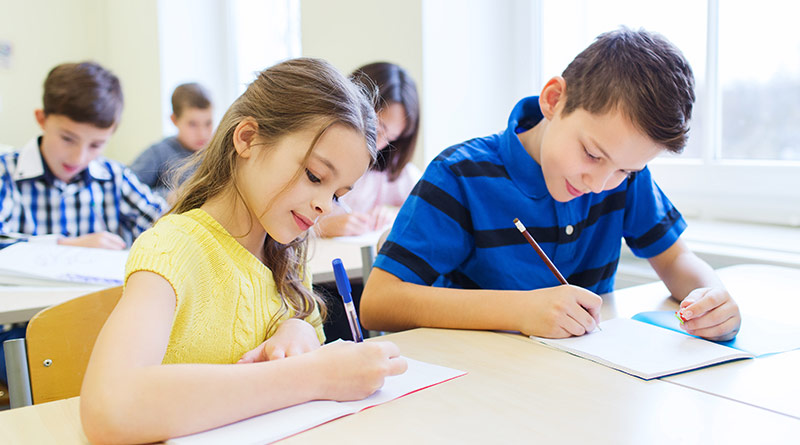

In [4]:
import numpy as np #
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as m                              

# Dataset Reading

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [186]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [184]:
# look for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

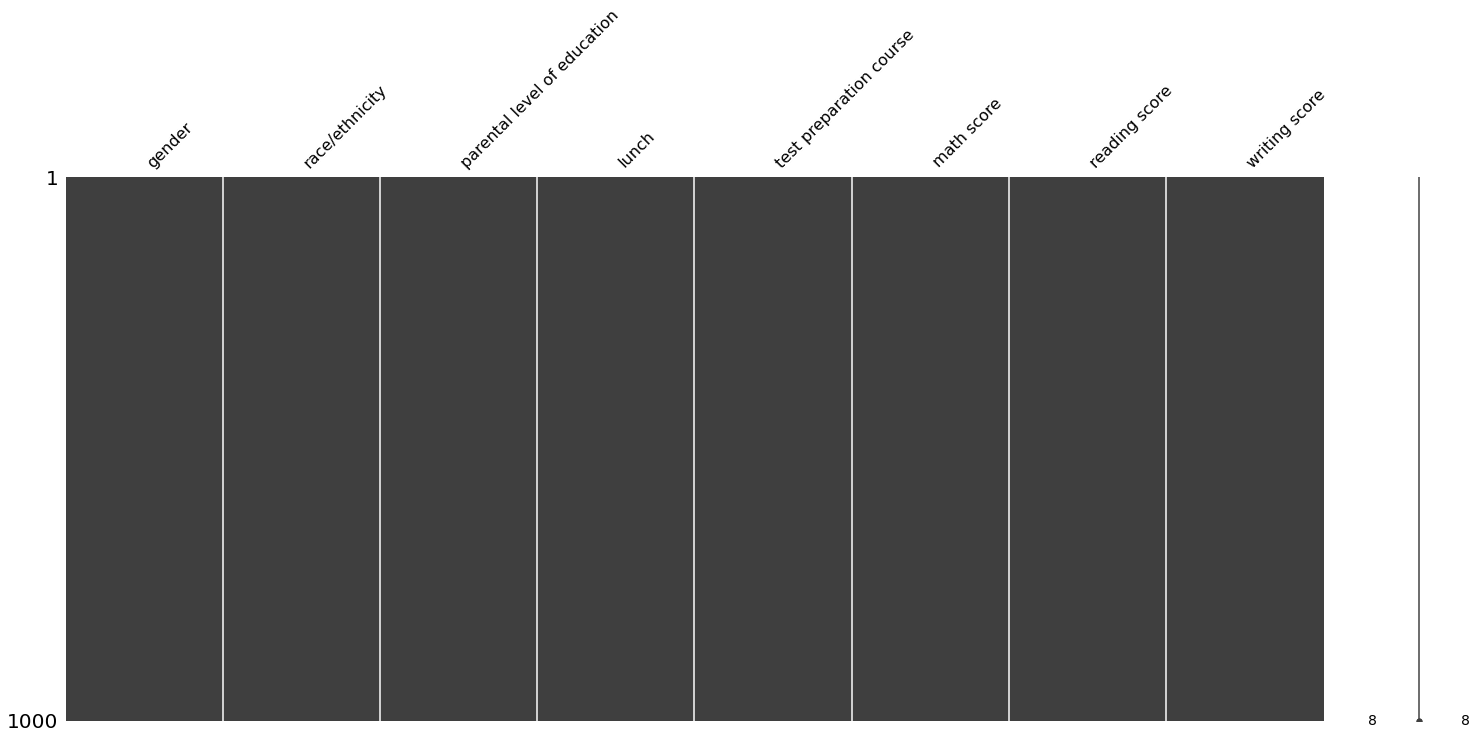

In [6]:
 m.matrix(df)

### No missing value present here

In [8]:
# Rename column labels
df.columns = ['gender','race','parent_education','lunch_type','test_completed','math_score','reading_score','writing_score']

In [10]:
df.info

<bound method DataFrame.info of      gender     race    parent_education    lunch_type test_completed  \
0    female  group B   bachelor's degree      standard           none   
1    female  group C        some college      standard      completed   
2    female  group B     master's degree      standard           none   
3      male  group A  associate's degree  free/reduced           none   
4      male  group C        some college      standard           none   
..      ...      ...                 ...           ...            ...   
995  female  group E     master's degree      standard      completed   
996    male  group C         high school  free/reduced           none   
997  female  group C         high school  free/reduced      completed   
998  female  group D        some college      standard      completed   
999  female  group D        some college  free/reduced           none   

     math_score  reading_score  writing_score  
0            72             72             

# Data Analysis

In [14]:
import plotly.express as px
fig = px.histogram(df,x='race')
fig.show()

In [17]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['math_score'],name='Math Score'))
fig.add_trace(go.Histogram(x=df['reading_score'],name='Reading Score'))
fig.add_trace(go.Histogram(x=df['writing_score'],name='Writing Score'))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [18]:
fig = px.histogram(df,x='gender')
fig.show()

In [20]:

df['Average'] = (df['reading_score'] + df['math_score'] + df['writing_score'])/3

df['grade'] = 'na'
df.loc[(df.Average >= 90) & (df.Average <= 100), 'grade'] = 'O' 
df.loc[(df.Average >= 80) & (df.Average < 90), 'grade'] = 'E' 
df.loc[(df.Average >= 70) & (df.Average < 80), 'grade'] = 'A'
df.loc[(df.Average >= 60) & (df.Average < 70), 'grade'] = 'B'
df.loc[(df.Average >= 50) & (df.Average < 60), 'grade'] = 'C'
df.loc[(df.Average >= 40) & (df.Average < 50), 'grade'] = 'D'
df.loc[(df.Average >= 0) & (df.Average < 40), 'grade'] = 'F'
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,grade,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,A,72.666667
1,female,group C,some college,standard,completed,69,90,88,E,82.333333
2,female,group B,master's degree,standard,none,90,95,93,O,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,49.333333
4,male,group C,some college,standard,none,76,78,75,A,76.333333


In [24]:
fig = px.histogram(df,x='grade',title='Grade Chart')
fig.show()

In [28]:
fig = px.histogram(df,x='parent_education',color='grade',title='Parents Education vs Grade Chart')
fig.show()

In [32]:
fig = px.box(df,y='race',color='grade',title='Race vs Grade Chart')
fig.show()

In [35]:
fig = px.histogram(df,y='gender',color='grade',title='Gender vs Grade Chart')
fig.show()

In [42]:
fig = px.scatter(df, x="reading_score", y="writing_score", color="grade",
                 size='math_score', hover_data=['parent_education'],title='Bubble chart')
fig.show()

In [37]:
fig = px.scatter_3d(df, x='math_score', y='reading_score', z='writing_score',
              color='race',title = 'Math, Reading and Writing Score with Race ')
fig.show()

In [40]:
fig = px.scatter_3d(df, x='math_score', y='reading_score', z='writing_score',
              color='grade', size='Average', size_max=18,
              symbol='lunch_type', opacity=0.7,title= 'Mega Plot')
fig.show()

In [33]:
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,grade,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,A,72.666667
1,female,group C,some college,standard,completed,69,90,88,E,82.333333
2,female,group B,master's degree,standard,none,90,95,93,O,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,49.333333
4,male,group C,some college,standard,none,76,78,75,A,76.333333


# HEATMAP

<AxesSubplot:>

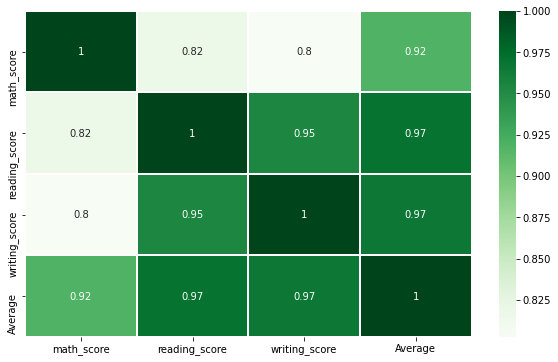

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidth=1)


# Train model(Linear regression)

In [53]:
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,grade,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,A,72.666667
1,female,group C,some college,standard,completed,69,90,88,E,82.333333
2,female,group B,master's degree,standard,none,90,95,93,O,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,49.333333
4,male,group C,some college,standard,none,76,78,75,A,76.333333


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['parent_education'] = le.fit_transform(df['parent_education'])
df['test_completed'] = le.fit_transform(df['test_completed'])
df['lunch_type'] = le.fit_transform(df['lunch_type'])

In [57]:
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,grade,Average
0,0,1,1,1,1,72,72,74,A,72.666667
1,0,2,4,1,0,69,90,88,E,82.333333
2,0,1,3,1,1,90,95,93,O,92.666667
3,1,0,0,0,1,47,57,44,D,49.333333
4,1,2,4,1,1,76,78,75,A,76.333333


In [131]:
X = df[['gender','race','parent_education','lunch_type','test_completed','math_score','reading_score']].values

In [132]:
XX = df[['gender','race','parent_education','lunch_type','test_completed','reading_score','writing_score']].values

In [133]:
XXX = df[['gender','race','parent_education','lunch_type','test_completed','math_score','writing_score']].values

In [134]:
y = df['writing_score']
y = y.values
y = y.reshape(len(y),1)

In [135]:
yy = df['math_score']
yy = yy.values
yy = yy.reshape(len(y),1)

In [136]:
yyy = df['reading_score']
yyy = yyy.values
yyy = yyy.reshape(len(y),1)

# Prediction for Writing Score 

## Train Test Split 

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling 

In [138]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Support Vector Regressor with Linear Kernel

In [139]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(kernel='linear')

## Prediction

In [140]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
data

array([[ 70.  ,  74.  ],
       [ 72.28,  72.  ],
       [ 44.18,  50.  ],
       [ 61.44,  64.  ],
       [ 75.99,  76.  ],
       [ 72.38,  69.  ],
       [ 69.85,  75.  ],
       [ 40.75,  42.  ],
       [ 88.42,  81.  ],
       [ 34.42,  36.  ],
       [ 51.72,  52.  ],
       [ 66.35,  70.  ],
       [ 82.68,  79.  ],
       [ 76.35,  80.  ],
       [ 58.82,  58.  ],
       [ 40.94,  43.  ],
       [ 47.07,  51.  ],
       [ 92.01,  87.  ],
       [ 54.18,  58.  ],
       [ 77.65,  81.  ],
       [ 65.7 ,  61.  ],
       [ 58.6 ,  56.  ],
       [ 76.46,  80.  ],
       [ 57.79,  57.  ],
       [ 44.84,  44.  ],
       [ 61.44,  61.  ],
       [ 53.65,  57.  ],
       [ 49.05,  47.  ],
       [ 67.33,  64.  ],
       [ 87.72,  88.  ],
       [ 82.6 ,  82.  ],
       [ 84.84,  90.  ],
       [ 90.44,  93.  ],
       [ 59.62,  60.  ],
       [ 60.76,  56.  ],
       [ 78.02,  84.  ],
       [ 97.34, 100.  ],
       [ 60.88,  53.  ],
       [ 76.15,  80.  ],
       [ 72.21,  77.  ],


## Accuracy

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9385429468958566

# Prediction for Math Score

## Train Test Split 

In [142]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.25, random_state = 0)

## Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
sc_XX = StandardScaler()
sc_yy = StandardScaler()
XX_train = sc_XX.fit_transform(XX_train)
yy_train = sc_yy.fit_transform(yy_train)

## Support Vector Regressor with RBF Kernel

In [144]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(XX_train, yy_train)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

## Prediction

In [145]:
yy_pred = sc_yy.inverse_transform(regressor.predict(sc_XX.transform(XX_test)))
np.set_printoptions(precision=2)
data1 = np.concatenate((yy_pred.reshape(len(yy_pred),1), yy_test.reshape(len(yy_test),1)),1)
data1

array([[ 65.07,  62.  ],
       [ 77.14,  87.  ],
       [ 47.72,  40.  ],
       [ 67.6 ,  77.  ],
       [ 69.38,  69.  ],
       [ 71.34,  78.  ],
       [ 65.9 ,  67.  ],
       [ 48.42,  46.  ],
       [ 89.31,  99.  ],
       [ 42.98,  46.  ],
       [ 42.36,  54.  ],
       [ 59.85,  53.  ],
       [ 81.75,  91.  ],
       [ 87.  ,  84.  ],
       [ 45.8 ,  48.  ],
       [ 33.32,  33.  ],
       [ 55.77,  57.  ],
       [ 79.43,  81.  ],
       [ 50.36,  50.  ],
       [ 83.4 ,  80.  ],
       [ 55.64,  63.  ],
       [ 48.36,  52.  ],
       [ 71.4 ,  73.  ],
       [ 63.98,  66.  ],
       [ 46.44,  55.  ],
       [ 66.45,  68.  ],
       [ 62.22,  65.  ],
       [ 52.32,  60.  ],
       [ 57.63,  53.  ],
       [ 80.29,  69.  ],
       [ 74.07,  71.  ],
       [ 88.92,  93.  ],
       [ 82.86,  82.  ],
       [ 53.83,  48.  ],
       [ 41.55,  52.  ],
       [ 88.3 ,  92.  ],
       [ 88.52,  92.  ],
       [ 58.12,  69.  ],
       [ 64.49,  57.  ],
       [ 69.18,  69.  ],


## Accuracy

In [146]:
from sklearn.metrics import r2_score
r2_score(yy_test, yy_pred)

0.8409690725576654

# Prediction for Reading Score

## Train Test Split 

In [147]:
from sklearn.model_selection import train_test_split
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy, test_size = 0.25, random_state = 0)

## Feature Scaling

In [148]:
from sklearn.preprocessing import StandardScaler
sc_XXX = StandardScaler()
sc_yyy = StandardScaler()
XXX_train = sc_XXX.fit_transform(XXX_train)
yyy_train = sc_yyy.fit_transform(yyy_train)

# Support Vector Regressor with Polynomial Kernel

In [149]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(XXX_train, yyy_train)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(kernel='poly')

## Prediction

In [150]:
yyy_pred = sc_yyy.inverse_transform(regressor.predict(sc_XXX.transform(XXX_test)))
np.set_printoptions(precision=2)
data2 = np.concatenate((yyy_pred.reshape(len(yyy_pred),1), yyy_test.reshape(len(yyy_test),1)),1)
data2

array([[ 72.95,  72.  ],
       [ 77.4 ,  73.  ],
       [ 47.1 ,  46.  ],
       [ 69.78,  62.  ],
       [ 74.6 ,  78.  ],
       [ 72.96,  72.  ],
       [ 74.24,  69.  ],
       [ 45.12,  43.  ],
       [ 89.3 ,  87.  ],
       [ 43.33,  34.  ],
       [ 61.01,  48.  ],
       [ 69.98,  70.  ],
       [ 81.93,  81.  ],
       [ 81.29,  80.  ],
       [ 59.36,  56.  ],
       [ 49.06,  41.  ],
       [ 55.97,  48.  ],
       [ 84.5 ,  91.  ],
       [ 59.87,  53.  ],
       [ 82.17,  78.  ],
       [ 65.62,  65.  ],
       [ 58.6 ,  59.  ],
       [ 79.64,  76.  ],
       [ 61.61,  60.  ],
       [ 48.08,  46.  ],
       [ 64.91,  65.  ],
       [ 60.56,  54.  ],
       [ 49.54,  44.  ],
       [ 65.96,  72.  ],
       [ 83.63,  90.  ],
       [ 81.76,  87.  ],
       [ 91.18,  84.  ],
       [ 93.91,  93.  ],
       [ 60.95,  62.  ],
       [ 56.96,  57.  ],
       [ 85.62,  79.  ],
       [ 96.24, 100.  ],
       [ 57.5 ,  58.  ],
       [ 74.23,  77.  ],
       [ 75.75,  72.  ],


## Accuracy

In [151]:
from sklearn.metrics import r2_score
r2_score(yyy_test, yyy_pred)

0.9072807517162343

In [152]:
print("Accuracy of Writing Score Prediction : ",r2_score(y_test, y_pred))
print("Accuracy of Math Score Prediction : ",r2_score(yy_test, yy_pred))
print("Accuracy of Reading Score Prediction : ",r2_score(yyy_test, yyy_pred))

Accuracy of Writing Score Prediction :  0.9385429468958566
Accuracy of Math Score Prediction :  0.8409690725576654
Accuracy of Reading Score Prediction :  0.9072807517162343


In [153]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')
dataset = pd.read_csv('accuracy.csv')

dataset1 = pd.DataFrame({'y_test': data1[:, 0], 'y_pred': data1[:, 1]})
dataset1.to_csv('accuracy1.csv')
dataset1 = pd.read_csv('accuracy1.csv')

dataset2 = pd.DataFrame({'y_test': data2[:, 0], 'y_pred': data2[:, 1]})
dataset2.to_csv('accuracy2.csv')
dataset2 = pd.read_csv('accuracy2.csv')

# Actual Value vs Predicted Value

## Prediction For Writing Marks

In [154]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))


## Prediction For Math Marks 

In [155]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset1['Unnamed: 0'], y=dataset1['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset1['Unnamed: 0'], y=dataset1['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))

## Prediction For Reading Marks 

In [156]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset2['Unnamed: 0'], y=dataset2['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset2['Unnamed: 0'], y=dataset2['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))